In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\busra\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\busra\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\busra\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
dataframe = pd.read_csv("qgismergeddata10.csv")
dataframe.head(10)

,Unnamed: 0,WKT,field_1,Unnamed_ 0,Text,Latitude,Longitude,Country,City,Language,...,addr_stree,addr_city,long,Lat,n,distance,feature_x,feature_y,nearest_x,nearest_y
0,0,POINT (-0.15012839 51.50518452),0,0,talking to some great journos this morning all...,51.505185,-0.150128,GB,London,en,...,NaN,NaN,-0.150137,51.505119,1,0.000066,-0.150128,51.505185,-0.150137,51.505119
1,1,POINT (-0.1253311 51.5134512),1,3,a little snippet from my sundayjazzcongregati...,51.513451,-0.125331,GB,London,en,...,Langley Street,London,-0.125117,51.513159,1,0.000362,-0.125331,51.513451,-0.125117,51.513159
2,2,POINT (-2.2426305 53.4807593),2,4,if you're a pharmaceutical professional in m...,53.480759,-2.242631,GB,Manchester,en,...,Spring Gardens,Manchester,-2.242036,53.480271,1,0.000769,-2.242631,53.480759,-2.242036,53.480271
3,3,POINT (-0.12715407 51.51523763),3,5,our 2 day summit kicks off in our new office ...,51.515238,-0.127154,GB,London,en,...,Shaftesbury Avenue,London,-0.127016,51.514807,1,0.000452,-0.127154,51.515238,-0.127016,51.514807
4,4,POINT (0.0702741 51.4307296),4,7,""" hell yeah! x""\nlook at you all posh on...",51.430730,0.070274,GB,London,en,...,Sidcup Road,New Eltham,0.073904,51.432197,1,0.003915,0.070274,51.430730,0.073904,51.432197
5,5,POINT (-0.45988083 51.46971536),5,9,"2 hours to kill (at london (lhr) in hounslow,...",51.469715,-0.459881,GB,London,en,...,NaN,NaN,-0.459123,51.470215,1,0.000908,-0.459881,51.469715,-0.459123,51.470215
6,6,POINT (-0.13134784 51.51330224),6,12,when life gives you lemon choux with meringue ...,51.513302,-0.131348,GB,London,en,...,Frith Street,London,-0.131361,51.513296,1,0.000015,-0.131348,51.513302,-0.131361,51.513296
7,7,POINT (0.0203125 51.61967125),7,13,egaylity homophobia in morocco gay or stra...,51.619671,0.020313,GB,London,en,...,NaN,NaN,0.025516,51.615467,1,0.006690,0.020313,51.619671,0.025516,51.615467
8,8,POINT (0.0203125 51.61967125),8,14,egaylity homophobia in morocco gay or stra...,51.619671,0.020313,GB,London,en,...,NaN,NaN,0.025516,51.615467,1,0.006690,0.020313,51.619671,0.025516,51.615467
9,9,POINT (-0.07238491 51.52108499),9,30,twin peaks 20 04 16 at rough trade,51.521085,-0.072385,GB,London,en,...,Dray Walk,London,-0.072292,51.520821,1,0.000280,-0.072385,51.521085,-0.072292,51.520821


In [5]:
dataframe.Text_Clean.iloc[4]

'hell yeah  x  look at you      all posh on t telly'

In [6]:
dataframe["Text_Clean"].head(50)

0     talking to some great journos this morning all...
1     a little snippet from my  sundayjazzcongregati...
2     if you re a  pharmaceutical professional in  m...
3     our 2 day  summit kicks off in our new office ...
4     hell yeah  x  look at you      all posh on t t...
5     2 hours to kill  at london   lhr  in hounslow ...
6     when life gives you lemon choux with meringue ...
7     egaylity    homophobia in morocco  gay or stra...
8     egaylity    homophobia in morocco  gay or stra...
9                    twin peaks 20 04 16 at rough trade
10    pure s hannah booth  amp  peter horobin at las...
11    join the kellogg team  see our latest  marketi...
12    are you ready to learn about the legendary dan...
13         beat me on the bottom with a woman s  weekly
14     i m at financial times in london  greater london
15    the view on  bishopsgate on my  runcommute  la...
16    that  s why i  m here in  london now  hip hip ...
17    maintain your discipline and get the resul

In [7]:
#dataset.drop_duplicates(subset=['Text_Clean'])
dataframe.drop_duplicates(subset='Text_Clean', keep='last', inplace=True)
print(dataframe)

       Unnamed: 0                              WKT  field_1  Unnamed_ 0  \
0               0  POINT (-0.15012839 51.50518452)        0           0   
1               1    POINT (-0.1253311 51.5134512)        1           3   
2               2    POINT (-2.2426305 53.4807593)        2           4   
3               3  POINT (-0.12715407 51.51523763)        3           5   
4               4     POINT (0.0702741 51.4307296)        4           7   
...           ...                              ...      ...         ...   
40975       41963   POINT (0.05158005 51.44996271)    40432      154885   
40976       41964    POINT (-0.1277583 51.5073509)    40433      154888   
40977       41965    POINT (-0.1086113 51.5164374)    40434      154889   
40978       41966  POINT (-0.14284397 51.50134968)    40435      154902   
40979       41967  POINT (-2.27429867 53.36235908)    40436      154913   

                                                    Text   Latitude  \
0      talking to some great

In [8]:
dataframe["Text_Clean"].head(50)

0     talking to some great journos this morning all...
1     a little snippet from my  sundayjazzcongregati...
2     if you re a  pharmaceutical professional in  m...
3     our 2 day  summit kicks off in our new office ...
4     hell yeah  x  look at you      all posh on t t...
5     2 hours to kill  at london   lhr  in hounslow ...
6     when life gives you lemon choux with meringue ...
8     egaylity    homophobia in morocco  gay or stra...
9                    twin peaks 20 04 16 at rough trade
10    pure s hannah booth  amp  peter horobin at las...
11    join the kellogg team  see our latest  marketi...
12    are you ready to learn about the legendary dan...
13         beat me on the bottom with a woman s  weekly
15    the view on  bishopsgate on my  runcommute  la...
16    that  s why i  m here in  london now  hip hip ...
17    maintain your discipline and get the results y...
18    really  it s my birthday  happy birthday to an...
19                     look  a red panda at  ren

In [9]:
print(dataframe.duplicated(subset=['Text_Clean']).sum())

0


<font size="5">Sentiment Analyzer</font>

In [10]:
sid = SentimentIntensityAnalyzer()

def sentiment(sentence):
  score = sid.polarity_scores(sentence)["compound"]
  if score>0.05:
    return "positive"

  else:
    return "negative"

    

dataframe["sentiment"] = dataframe["Text_Clean"].apply(sentiment)

In [11]:

dataframe.tail(50)

,Unnamed: 0,WKT,field_1,Unnamed_ 0,Text,Latitude,Longitude,Country,City,Language,...,addr_city,long,Lat,n,distance,feature_x,feature_y,nearest_x,nearest_y,sentiment
40919,41907,POINT (-0.12593369 51.53155392),40382,154749,i love trains i love this station onyva at ...,51.531554,-0.125934,GB,London,en,...,NaN,-0.126253,51.531642,1,0.000332,-0.125934,51.531554,-0.126253,51.531642,positive
40920,41908,POINT (-0.12597222 51.49222222),40383,154751,london millbanktower view at millbank tower,51.492222,-0.125972,GB,London,en,...,London,-0.125451,51.492929,1,0.000878,-0.125972,51.492222,-0.125451,51.492929,negative
40922,41910,POINT (-0.1771344 51.51676596),40385,154759,"i'm at paddington in london, greater london",51.516766,-0.177134,GB,London,en,...,NaN,-0.177144,51.516492,1,0.000274,-0.177134,51.516766,-0.177144,51.516492,positive
40923,41911,POINT (-0.0751615 51.5038787),40386,154766,"spring jacket crisis? yep,been there! poncho i...",51.503879,-0.075162,GB,London,en,...,NaN,-0.075310,51.504108,1,0.000273,-0.075162,51.503879,-0.075310,51.504108,positive
40924,41912,POINT (-0.0738975 51.5243558),40387,154767,happy thursday ! shoreditch london thursday...,51.524356,-0.073898,GB,London,en,...,London,-0.073924,51.524409,1,0.000059,-0.073898,51.524356,-0.073924,51.524409,positive
40925,41913,POINT (-2.2362363 53.4819794),40388,154771,today's hairstyle of the devil at oxfamemporiu...,53.481979,-2.236236,GB,Manchester,en,...,Manchester,-2.235913,53.482229,1,0.000409,-2.236236,53.481979,-2.235913,53.482229,negative
40926,41914,POINT (-0.0063884 51.48282016),40389,154772,solitary swan at greenwich pier at university ...,51.482820,-0.006388,GB,London,en,...,NaN,-0.008421,51.482909,1,0.002035,-0.006388,51.482820,-0.008421,51.482909,negative
40927,41915,POINT (0.0384325 51.53177775),40390,154773,these three played superbly yesterday and have...,51.531778,0.038433,GB,London,en,...,London,0.038539,51.530475,1,0.001307,0.038433,51.531778,0.038539,51.530475,positive
40929,41917,POINT (-0.48604565 51.47187989),40392,154782,ricky \nheathrow_airport t5 at heathrow termi...,51.471880,-0.486046,GB,London,en,...,NaN,-0.486807,51.471811,1,0.000764,-0.486046,51.471880,-0.486807,51.471811,negative
40930,41918,POINT (-0.13132558 51.48338102),40393,154788,we hosted the wonderful with live music from ...,51.483381,-0.131326,GB,London,en,...,London,-0.130900,51.482036,1,0.001411,-0.131326,51.483381,-0.130900,51.482036,positive


In [12]:
dataframe = dataframe.reset_index(drop=True)

In [13]:
dataframe.head(10)

,Unnamed: 0,WKT,field_1,Unnamed_ 0,Text,Latitude,Longitude,Country,City,Language,...,addr_city,long,Lat,n,distance,feature_x,feature_y,nearest_x,nearest_y,sentiment
0,0,POINT (-0.15012839 51.50518452),0,0,talking to some great journos this morning all...,51.505185,-0.150128,GB,London,en,...,NaN,-0.150137,51.505119,1,0.000066,-0.150128,51.505185,-0.150137,51.505119,positive
1,1,POINT (-0.1253311 51.5134512),1,3,a little snippet from my sundayjazzcongregati...,51.513451,-0.125331,GB,London,en,...,London,-0.125117,51.513159,1,0.000362,-0.125331,51.513451,-0.125117,51.513159,positive
2,2,POINT (-2.2426305 53.4807593),2,4,if you're a pharmaceutical professional in m...,53.480759,-2.242631,GB,Manchester,en,...,Manchester,-2.242036,53.480271,1,0.000769,-2.242631,53.480759,-2.242036,53.480271,negative
3,3,POINT (-0.12715407 51.51523763),3,5,our 2 day summit kicks off in our new office ...,51.515238,-0.127154,GB,London,en,...,London,-0.127016,51.514807,1,0.000452,-0.127154,51.515238,-0.127016,51.514807,negative
4,4,POINT (0.0702741 51.4307296),4,7,""" hell yeah! x""\nlook at you all posh on...",51.430730,0.070274,GB,London,en,...,New Eltham,0.073904,51.432197,1,0.003915,0.070274,51.430730,0.073904,51.432197,negative
5,5,POINT (-0.45988083 51.46971536),5,9,"2 hours to kill (at london (lhr) in hounslow,...",51.469715,-0.459881,GB,London,en,...,NaN,-0.459123,51.470215,1,0.000908,-0.459881,51.469715,-0.459123,51.470215,negative
6,6,POINT (-0.13134784 51.51330224),6,12,when life gives you lemon choux with meringue ...,51.513302,-0.131348,GB,London,en,...,London,-0.131361,51.513296,1,0.000015,-0.131348,51.513302,-0.131361,51.513296,positive
7,8,POINT (0.0203125 51.61967125),8,14,egaylity homophobia in morocco gay or stra...,51.619671,0.020313,GB,London,en,...,NaN,0.025516,51.615467,1,0.006690,0.020313,51.619671,0.025516,51.615467,negative
8,9,POINT (-0.07238491 51.52108499),9,30,twin peaks 20 04 16 at rough trade,51.521085,-0.072385,GB,London,en,...,London,-0.072292,51.520821,1,0.000280,-0.072385,51.521085,-0.072292,51.520821,negative
9,10,POINT (-0.08795193 51.52622407),10,42,pure's hannah booth amp peter horobin at las...,51.526224,-0.087952,GB,London,en,...,NaN,-0.087979,51.526198,1,0.000037,-0.087952,51.526224,-0.087979,51.526198,negative


In [14]:
dataframe.sentiment.value_counts()

negative    19457
positive    17378
Name: sentiment, dtype: int64

In [15]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
dataframe['word count'] = dataframe['Text_Clean'].apply(word_count)
dataframe.head(3)

,Unnamed: 0,WKT,field_1,Unnamed_ 0,Text,Latitude,Longitude,Country,City,Language,...,long,Lat,n,distance,feature_x,feature_y,nearest_x,nearest_y,sentiment,word count
0,0,POINT (-0.15012839 51.50518452),0,0,talking to some great journos this morning all...,51.505185,-0.150128,GB,London,en,...,-0.150137,51.505119,1,0.000066,-0.150128,51.505185,-0.150137,51.505119,positive,13
1,1,POINT (-0.1253311 51.5134512),1,3,a little snippet from my sundayjazzcongregati...,51.513451,-0.125331,GB,London,en,...,-0.125117,51.513159,1,0.000362,-0.125331,51.513451,-0.125117,51.513159,positive,11
2,2,POINT (-2.2426305 53.4807593),2,4,if you're a pharmaceutical professional in m...,53.480759,-2.242631,GB,Manchester,en,...,-2.242036,53.480271,1,0.000769,-2.242631,53.480759,-2.242036,53.480271,negative,14


In [16]:
#visualize word cloud

In [20]:
import wordcloud

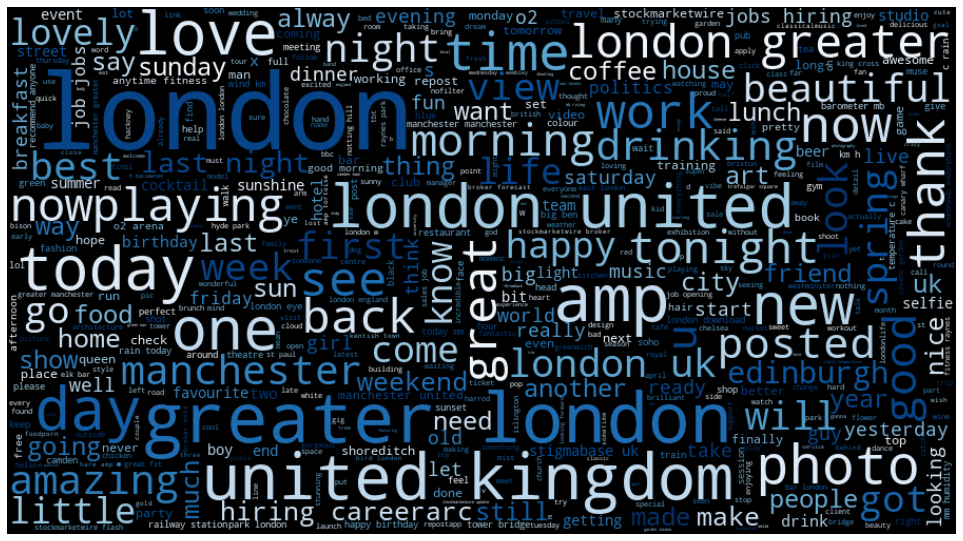

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Read the whole text.
s = " ".join(dataframe.Text.values)
text = s

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True,
                      stopwords = set(STOPWORDS)
                      ).generate(text)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
dataframe['sentiment_n'] = dataframe['sentiment'].factorize()[0]
category_id_df2 = dataframe[['sentiment', 'sentiment_n']].drop_duplicates().sort_values('sentiment_n')
category_to_id2 = dict(category_id_df2.values)
id_to_category2 = dict(category_id_df2[['sentiment_n', 'sentiment']].values)
dataframe.head(50)

,Unnamed: 0,WKT,field_1,Unnamed_ 0,Text,Latitude,Longitude,Country,City,Language,...,Lat,n,distance,feature_x,feature_y,nearest_x,nearest_y,sentiment,word count,sentiment_n
0,0,POINT (-0.15012839 51.50518452),0,0,talking to some great journos this morning all...,51.505185,-0.150128,GB,London,en,...,51.505119,1,0.000066,-0.150128,51.505185,-0.150137,51.505119,positive,13,0
1,1,POINT (-0.1253311 51.5134512),1,3,a little snippet from my sundayjazzcongregati...,51.513451,-0.125331,GB,London,en,...,51.513159,1,0.000362,-0.125331,51.513451,-0.125117,51.513159,positive,11,0
2,2,POINT (-2.2426305 53.4807593),2,4,if you're a pharmaceutical professional in m...,53.480759,-2.242631,GB,Manchester,en,...,53.480271,1,0.000769,-2.242631,53.480759,-2.242036,53.480271,negative,14,1
3,3,POINT (-0.12715407 51.51523763),3,5,our 2 day summit kicks off in our new office ...,51.515238,-0.127154,GB,London,en,...,51.514807,1,0.000452,-0.127154,51.515238,-0.127016,51.514807,negative,16,1
4,4,POINT (0.0702741 51.4307296),4,7,""" hell yeah! x""\nlook at you all posh on...",51.430730,0.070274,GB,London,en,...,51.432197,1,0.003915,0.070274,51.430730,0.073904,51.432197,negative,11,1
5,5,POINT (-0.45988083 51.46971536),5,9,"2 hours to kill (at london (lhr) in hounslow,...",51.469715,-0.459881,GB,London,en,...,51.470215,1,0.000908,-0.459881,51.469715,-0.459123,51.470215,negative,10,1
6,6,POINT (-0.13134784 51.51330224),6,12,when life gives you lemon choux with meringue ...,51.513302,-0.131348,GB,London,en,...,51.513296,1,0.000015,-0.131348,51.513302,-0.131361,51.513296,positive,17,0
7,8,POINT (0.0203125 51.61967125),8,14,egaylity homophobia in morocco gay or stra...,51.619671,0.020313,GB,London,en,...,51.615467,1,0.006690,0.020313,51.619671,0.025516,51.615467,negative,17,1
8,9,POINT (-0.07238491 51.52108499),9,30,twin peaks 20 04 16 at rough trade,51.521085,-0.072385,GB,London,en,...,51.520821,1,0.000280,-0.072385,51.521085,-0.072292,51.520821,negative,8,1
9,10,POINT (-0.08795193 51.52622407),10,42,pure's hannah booth amp peter horobin at las...,51.526224,-0.087952,GB,London,en,...,51.526198,1,0.000037,-0.087952,51.526224,-0.087979,51.526198,negative,16,1


<font size="5">Data Visualization of Sentiment Variables</font>

In [24]:
a = dataframe[["City","sentiment_n","amenity"]]
a = a[a['City'] == 'London']

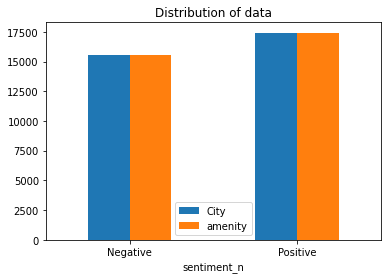

In [25]:
# Plotting the distribution for dataset.
#f, ax = plot.subplots(figsize=(18,5))
#ax = dataframe.groupby('sentiment_n').count().plot(kind='bar', title='Distribution of data',legend=True)
ax = a.groupby("sentiment_n").count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(a['City']), list(a['sentiment_n'])

<AxesSubplot:xlabel='sentiment_n', ylabel='count'>

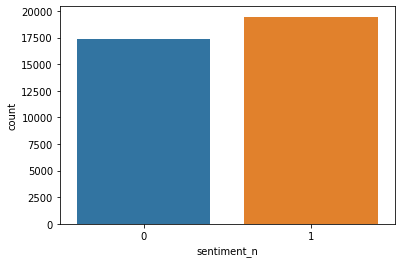

In [26]:
import seaborn as sns
sns.countplot(x='sentiment_n', data=dataframe)

<font size="5">Data Preprocessing</font>

<font size="3">Selecting the text and Senteminet_n column for our further analysis</font>

In [27]:
data=dataframe[['Text_Clean','sentiment_n']]

<font size="3">Print unique values of sentiment variables</font>

In [28]:
data['sentiment_n'].unique()

array([0, 1], dtype=int64)

<font size="3">Separating positive and negative tweets</font>

In [29]:
data_pos = data[data['sentiment_n'] == 0]
data_neg = data[data['sentiment_n'] == 1]

<font size="3">Combining positive and negative tweets</font>

In [30]:
dataframe = pd.concat([data_pos,data_neg])

<font size="3">Making statement text in lower case</font>

In [32]:
dataframe['Text_Clean']=dataframe['Text_Clean'].str.lower()
dataframe['Text_Clean'].tail()

36828                 film review  the brand new testament
36829    we re  hiring  click to apply  sales developme...
36830    frontroomfatloss  try this  another of our fro...
36831    london  england  hr  job  payroll specialist a...
36832    earlyaction   still a big gap between rhetoric...
Name: Text_Clean, dtype: object

<font size="3">Defining set containing all stopwords in English.</font>

In [33]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

<font size="3">Cleaning and removing the above stop words list from the tweet text</font>

In [34]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(lambda text: cleaning_stopwords(text))
dataframe['Text_Clean'].head()

0       talking great journos morning metropolitan como
1     little snippet sundayjazzcongregation great ni...
6     life gives lemon choux meringue little bit lem...
10    join kellogg team see latest marketing job ope...
11    ready learn legendary dancers took world storm...
Name: Text_Clean, dtype: object

<font size="3">Cleaning and removing punctuations</font>

In [36]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataframe['Text_Clean']= dataframe['Text_Clean'].apply(lambda x: cleaning_punctuations(x))
dataframe['Text_Clean'].tail()

36828                      film review brand new testament
36829    hiring click apply sales development specialis...
36830    frontroomfatloss try another front room fat bu...
36831    london england hr job payroll specialist starb...
36832    earlyaction still big gap rhetoric reality say...
Name: Text_Clean, dtype: object

<font size="3">Cleaning and removing repeating characters</font>

In [37]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(lambda x: cleaning_repeating_char(x))
dataframe['Text_Clean'].tail()

36828                      film review brand new testament
36829    hiring click apply sales development specialis...
36830    frontroomfatloss try another front room fat bu...
36831    london england hr job payroll specialist starb...
36832    earlyaction still big gap rhetoric reality say...
Name: Text_Clean, dtype: object

<font size="3">Cleaning and removing URL’s</font>

In [39]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(lambda x: cleaning_URLs(x))
dataframe['Text_Clean'].tail()

36828                      film review brand new testament
36829    hiring click apply sales development specialis...
36830    frontroomfatloss try another front room fat bu...
36831    london england hr job payroll specialist starb...
36832    earlyaction still big gap rhetoric reality say...
Name: Text_Clean, dtype: object

<font size="3">Cleaning and removing Numeric numbers</font>

In [40]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(lambda x: cleaning_numbers(x))
dataframe['Text_Clean'].tail()

36828                      film review brand new testament
36829    hiring click apply sales development specialis...
36830    frontroomfatloss try another front room fat bu...
36831    london england hr job payroll specialist starb...
36832    earlyaction still big gap rhetoric reality say...
Name: Text_Clean, dtype: object

In [41]:
dataframe

,Text_Clean,sentiment_n
0,talking great journos morning metropolitan como,0
1,little snippet sundayjazzcongregation great ni...,0
6,life gives lemon choux meringue little bit lem...,0
10,join kellogg team see latest marketing job ope...,0
11,ready learn legendary dancers took world storm...,0
...,...,...
36828,film review brand new testament,1
36829,hiring click apply sales development specialis...,1
36830,frontroomfatloss try another front room fat bu...,1
36831,london england hr job payroll specialist starb...,1


In [42]:
dataframe[dataframe['Text_Clean'].notna()]

,Text_Clean,sentiment_n
0,talking great journos morning metropolitan como,0
1,little snippet sundayjazzcongregation great ni...,0
6,life gives lemon choux meringue little bit lem...,0
10,join kellogg team see latest marketing job ope...,0
11,ready learn legendary dancers took world storm...,0
...,...,...
36828,film review brand new testament,1
36829,hiring click apply sales development specialis...,1
36830,frontroomfatloss try another front room fat bu...,1
36831,london england hr job payroll specialist starb...,1


<font size="3">Getting tokenization of tweet text</font>

In [43]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(tokenizer.tokenize)
dataframe['Text_Clean']

0        [talking, great, journos, morning, metropolita...
1        [little, snippet, sundayjazzcongregation, grea...
6        [life, gives, lemon, choux, meringue, little, ...
10       [join, kellogg, team, see, latest, marketing, ...
11       [ready, learn, legendary, dancers, took, world...
                               ...                        
36828                [film, review, brand, new, testament]
36829    [hiring, click, apply, sales, development, spe...
36830    [frontroomfatloss, try, another, front, room, ...
36831    [london, england, hr, job, payroll, specialist...
36832    [earlyaction, still, big, gap, rhetoric, reali...
Name: Text_Clean, Length: 36835, dtype: object

In [44]:
dataframe

,Text_Clean,sentiment_n
0,"[talking, great, journos, morning, metropolita...",0
1,"[little, snippet, sundayjazzcongregation, grea...",0
6,"[life, gives, lemon, choux, meringue, little, ...",0
10,"[join, kellogg, team, see, latest, marketing, ...",0
11,"[ready, learn, legendary, dancers, took, world...",0
...,...,...
36828,"[film, review, brand, new, testament]",1
36829,"[hiring, click, apply, sales, development, spe...",1
36830,"[frontroomfatloss, try, another, front, room, ...",1
36831,"[london, england, hr, job, payroll, specialist...",1


<font size="3">Applying Stemming</font>

In [45]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataframe['Text_Clean']= dataframe['Text_Clean'].apply(lambda x: stemming_on_text(x))
dataframe['Text_Clean'].head()

0     [talking, great, journos, morning, metropolita...
1     [little, snippet, sundayjazzcongregation, grea...
6     [life, gives, lemon, choux, meringue, little, ...
10    [join, kellogg, team, see, latest, marketing, ...
11    [ready, learn, legendary, dancers, took, world...
Name: Text_Clean, dtype: object

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<font size="3">Applying Lemmatizer</font>

In [47]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataframe['Text_Clean'] = dataframe['Text_Clean'].apply(lambda x: lemmatizer_on_text(x))
dataframe['Text_Clean'].head()

0     [talking, great, journos, morning, metropolita...
1     [little, snippet, sundayjazzcongregation, grea...
6     [life, gives, lemon, choux, meringue, little, ...
10    [join, kellogg, team, see, latest, marketing, ...
11    [ready, learn, legendary, dancers, took, world...
Name: Text_Clean, dtype: object

<font size="3">Separating input feature and label</font>

In [48]:
X=data.Text_Clean
y=data.sentiment_n

<font size="3">Splitting the data into Train and Test Subset</font>

In [49]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05)

<font size="5">Transforming Dataset using TF-IDF Vectorizer</font>

<font size="3">Fit the TF-IDF Vectorizer</font>

In [50]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  233136


<font size="3">Transform the data using TF-IDF Vectorizer</font>

In [51]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [67]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

<font size="5">
    
Model Building
    
    
 Three different models had been used respectively :

  --Bernoulli Naive Bayes
    
  --SVM (Support Vector Machine)
    
  --Logistic Regression
</font>

<font size="3">Bernoulli Naive Bayes</font>

In [69]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       869
           1       0.83      0.90      0.86       973

    accuracy                           0.85      1842
   macro avg       0.85      0.85      0.85      1842
weighted avg       0.85      0.85      0.85      1842



<font size="3">Plot the ROC-AUC Curve for model-1</font>

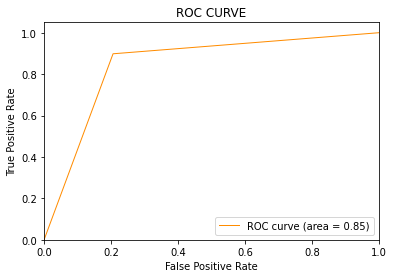

In [70]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<font size="3">SVM (Support Vector Machine)</font>

In [71]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       869
           1       0.92      0.93      0.93       973

    accuracy                           0.92      1842
   macro avg       0.92      0.92      0.92      1842
weighted avg       0.92      0.92      0.92      1842



<font size="3">Plot the ROC-AUC Curve for model-2</font>

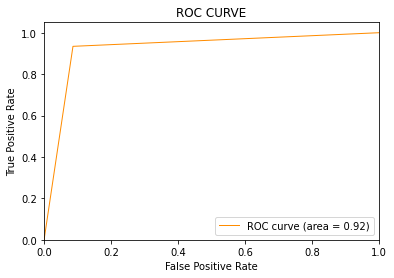

In [72]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<font size="3">Logistic Regression</font>

In [73]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       869
           1       0.89      0.92      0.90       973

    accuracy                           0.90      1842
   macro avg       0.90      0.89      0.89      1842
weighted avg       0.90      0.90      0.90      1842



<font size="3">Plot the ROC-AUC Curve for model-3</font>

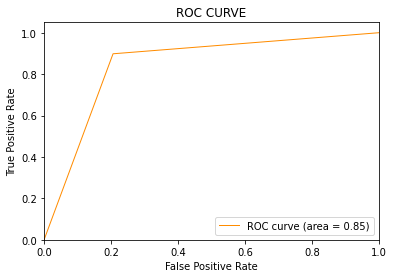

In [74]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<font size="3">Confusion matrix for model-1</font>

Text(0.5, 1.0, 'Confusion Matrix')

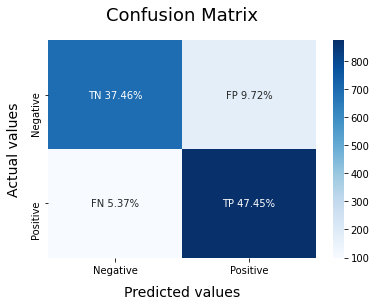

In [75]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
categories = ['Negative','Positive']
group_names = ['TN','FP','FN','TP']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

<font size="3">Confusion matrix for model-2</font>

Text(0.5, 1.0, 'Confusion Matrix')

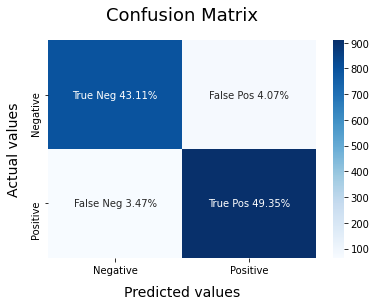

In [76]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

<font size="3">Confusion matrix for model-3</font>

Text(0.5, 1.0, 'Confusion Matrix')

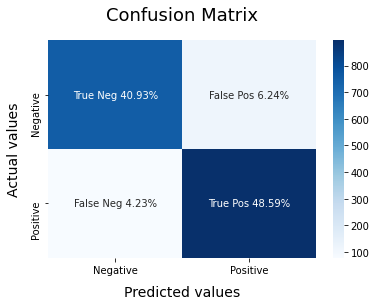

In [77]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred3)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [678]:
dataframe

,Text_Clean,sentiment_n
0,talking to some great journos this morning all...,0
1,a little snippet from my sundayjazzcongregatio...,0
6,when life gives you lemon choux with meringue ...,0
10,join the kellogg team see our latest marketing...,0
11,are you ready to learn about the legendary dan...,0
...,...,...
36429,film review the brand new testament,1
36430,we re hiring click to apply sales development ...,1
36431,frontroomfatloss try this another of our front...,1
36432,london england hr job payroll specialist at st...,1


In [ ]:
dataframe.to_csv('positiveandnegative.csv')